In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
ratings = pd.read_csv('ratings.csv')

In [4]:
users = pd.read_csv('users.csv')

In [5]:
movies = pd.read_excel('movies.xlsx')

In [68]:
movies.head(5)
len(movies)

3883

In [7]:
ratings.head(5)

,movieID,userID,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
users.head(5)

,userID,gender,ageGroup,occupation,zipcode
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


In [9]:
import seaborn as sns
%matplotlib inline

In [10]:
table = ratings.merge(movies, on="movieID")

In [11]:
table = table.merge(users , on="userID")

In [55]:
table.head(5)
#len(table)

,movieID,userID,rating,timestamp,title,gender,ageGroup,occupation,zipcode
0,1,1193,5,978300760,Toy Story (1995),M,25,12,90712
1,2,1193,5,978298413,Jumanji (1995),M,25,12,90712
2,12,1193,4,978220179,Dracula,M,25,12,90712
3,15,1193,4,978199279,Cutthroat Island (1995),M,25,12,90712
4,17,1193,5,978158471,Sense and Sensibility (1995),M,25,12,90712


In [63]:
count_ratings= table.groupby('title')['rating'].count()
#count_ratings = np.log(count_ratings)

In [57]:
#sns.jointplot(table['rating'] , table['ageGroup'])

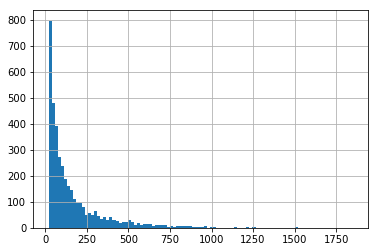

In [71]:
count_ratings.hist(bins = 100)

In [14]:
table.groupby('title')['rating'].mean().sort_values(ascending = False).head()

title
New Jersey Drive (1995)                     4.962963
I'll Be Home For Christmas (1998)           4.956522
Drowning Mona (2000)                        4.904762
Goya in Bordeaux (Goya en Bodeos) (1999)    4.890909
Farewell My Concubine (1993)                4.843137
Name: rating, dtype: float64

In [13]:
table.groupby('ageGroup')['rating'].count().sort_values(ascending = False).head()

ageGroup
25    206650
35    131322
18    128697
50     60591
45     48801
Name: rating, dtype: int64

In [15]:
table.groupby('title')['rating'].count().sort_values(ascending = False).head()

title
Sliding Doors (1998)    1850
Hamlet (1948)           1595
Shooter, The (1995)     1521
1-900 (1994)            1518
Star Trek               1517
Name: rating, dtype: int64

In [16]:
new_df = pd.DataFrame(table.groupby('title')['rating'].mean().sort_values(ascending = False))

In [17]:
new_df['num of ratings'] = pd.DataFrame(table.groupby('title')['rating'].count().sort_values(ascending = False))

In [18]:
new_df = new_df.sort_values('num of ratings',ascending = False)

In [19]:
new_df.head(5)

,rating,num of ratings
title,,
Sliding Doors (1998),3.555676,1850
Hamlet (1948),3.054545,1595
"Shooter, The (1995)",2.815911,1521
1-900 (1994),2.840580,1518
Star Trek,2.935399,1517


In [20]:
#sns.jointplot(x='rating',y ='num of ratings',data = 'new_df')
table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645833 entries, 0 to 645832
Data columns (total 9 columns):
movieID       645833 non-null int64
userID        645833 non-null int64
rating        645833 non-null int64
timestamp     645833 non-null int64
title         645833 non-null object
gender        645833 non-null object
ageGroup      645833 non-null int64
occupation    645833 non-null int64
zipcode       645833 non-null object
dtypes: int64(6), object(3)
memory usage: 49.3+ MB


In [65]:
#movies_matx = table.pivot_table(index='userID',columns='',values='rating')

In [24]:
something = table.pivot_table(index='title',columns='userID',values='rating')

In [25]:
movie_matx = something

In [26]:
something.head(10)

userID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
title,,,,,,,,,,,,,,,,,,,,,
2001,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"$1,000,000 Duck (1971)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,5.0,NaN,4.0,3.0
'Night Mother (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"'burbs, The (1989)",NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...And Justice for All (1979),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN
1-900 (1994),4.0,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,2.0,NaN,NaN,1.0,3.0,3.0,2.0,NaN,1.0,2.0
10 Things I Hate About You (1999),4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1961),5.0,NaN,4.0,3.0,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
sliding_door_values = movie_matx.loc['Sliding Doors (1998)']

In [119]:
print(sliding_door_values)

userID
1       4.0
2       4.0
3       3.0
4       NaN
5       3.0
6       1.0
7       3.0
8       NaN
9       NaN
10      3.0
11      3.0
12      1.0
13      4.0
14      NaN
15      1.0
16      4.0
17      3.0
18      2.0
19      3.0
20      NaN
21      4.0
22      5.0
23      NaN
24      NaN
25      5.0
26      NaN
27      NaN
28      NaN
29      NaN
30      5.0
       ... 
3923    4.0
3924    NaN
3925    3.0
3926    NaN
3927    4.0
3928    4.0
3929    NaN
3930    4.0
3931    NaN
3932    3.0
3933    NaN
3934    NaN
3935    NaN
3936    4.0
3937    2.0
3938    4.0
3939    3.0
3940    3.0
3941    4.0
3942    3.0
3943    NaN
3944    NaN
3945    NaN
3946    4.0
3947    NaN
3948    4.0
3949    NaN
3950    NaN
3951    NaN
3952    NaN
Name: Sliding Doors (1998), Length: 3652, dtype: float64


In [73]:
sliding_doors_corr = movie_matx.corrwith(sliding_door_values,axis=1)
#print (sliding_doors_corr)

In [91]:
corr_sliding_doors = pd.DataFrame(sliding_doors_corr , columns=['corelation'])
corr_sliding_doors.dropna(inplace = True)
corr_sliding_doors  = corr_sliding_doors.sort_values('corelation',ascending = False)
corr_sliding_doors.head(5)

,corelation
title,
Sliding Doors (1998),1.000000
Daddy Long Legs (1919),0.827465
Coming Apart (1969),0.806747
"New Age, The (1994)",0.801851
Candleshoe (1977),0.790569


In [92]:
corr_sliding_doors =corr_sliding_doors.join(new_df['num of ratings'])

In [93]:
max_sliding_door_values = corr_sliding_doors['num of ratings'].max()
norm_ratings = corr_sliding_doors['num of ratings']/max_sliding_door_values

In [94]:
corr_sliding_doors['norm_num_of_ratings'] = pd.DataFrame(norm_ratings)

In [95]:
mult_corr_num = corr_sliding_doors['corelation']*corr_sliding_doors['norm_num_of_ratings']
corr_sliding_doors['mult_corr_num ']=pd.DataFrame(mult_corr_num)
corr_sliding_doors.head()

,corelation,num of ratings,norm_num_of_ratings,mult_corr_num
title,,,,
Sliding Doors (1998),1.000000,1850,1.000000,1.000000
Daddy Long Legs (1919),0.827465,28,0.015135,0.012524
Coming Apart (1969),0.806747,22,0.011892,0.009594
"New Age, The (1994)",0.801851,29,0.015676,0.012570
Candleshoe (1977),0.790569,20,0.010811,0.008547


In [99]:
corr_sliding_doors.head()

,corelation,num of ratings,norm_num_of_ratings,mult_corr_num
title,,,,
Sliding Doors (1998),1.000000,1850,1.000000,1.000000
Daddy Long Legs (1919),0.827465,28,0.015135,0.012524
Coming Apart (1969),0.806747,22,0.011892,0.009594
"New Age, The (1994)",0.801851,29,0.015676,0.012570
Candleshoe (1977),0.790569,20,0.010811,0.008547


In [104]:
similar_to_sliding_doors_1 = corr_sliding_doors[corr_sliding_doors['num of ratings']>250].sort_values('mult_corr_num ',ascending=False)
similar_to_sliding_doors_1.head()

,corelation,num of ratings,norm_num_of_ratings,mult_corr_num
title,,,,
Sliding Doors (1998),1.000000,1850,1.000000,1.000000
Star Trek,0.320735,1517,0.820000,0.263003
1-900 (1994),0.261151,1518,0.820541,0.214285
Waiting for Guffman (1996),0.298683,1243,0.671892,0.200683
Rudy (1993),0.359805,1016,0.549189,0.197601


In [105]:
similar_to_sliding_doors_2 = corr_sliding_doors[corr_sliding_doors['num of ratings']>250].sort_values('corelation',ascending=False)
similar_to_sliding_doors_2.head()

,corelation,num of ratings,norm_num_of_ratings,mult_corr_num
title,,,,
Sliding Doors (1998),1.000000,1850,1.000000,1.000000
Fierce Creatures (1997),0.426998,778,0.420541,0.179570
Slaughterhouse (1987),0.412927,357,0.192973,0.079684
"World Is Not Enough, The (1999)",0.408085,370,0.200000,0.081617
Tin Men (1987),0.404930,312,0.168649,0.068291


In [ ]:
#now we are considering the age factor

In [107]:
table.head()

,movieID,userID,rating,timestamp,title,gender,ageGroup,occupation,zipcode
0,1,1193,5,978300760,Toy Story (1995),M,25,12,90712
1,2,1193,5,978298413,Jumanji (1995),M,25,12,90712
2,12,1193,4,978220179,Dracula,M,25,12,90712
3,15,1193,4,978199279,Cutthroat Island (1995),M,25,12,90712
4,17,1193,5,978158471,Sense and Sensibility (1995),M,25,12,90712


In [110]:
unique_ages = table['ageGroup'].unique()

In [117]:
abcd = pd.get_dummies(table['ageGroup'])
new_table = pd.concat([table , abcd],axis = 1)
new_table.head()

,movieID,userID,rating,timestamp,title,gender,ageGroup,occupation,zipcode,1,18,25,35,45,50,56
0,1,1193,5,978300760,Toy Story (1995),M,25,12,90712,0,0,1,0,0,0,0
1,2,1193,5,978298413,Jumanji (1995),M,25,12,90712,0,0,1,0,0,0,0
2,12,1193,4,978220179,Dracula,M,25,12,90712,0,0,1,0,0,0,0
3,15,1193,4,978199279,Cutthroat Island (1995),M,25,12,90712,0,0,1,0,0,0,0
4,17,1193,5,978158471,Sense and Sensibility (1995),M,25,12,90712,0,0,1,0,0,0,0


In [118]:
#there is a person who watched sliding doors movie and lie in the age group 25

In [121]:
user_and_age = pd.DataFrame(sliding_door_values)
user_and_age.head()

,Sliding Doors (1998)
userID,
1,4.0
2,4.0
3,3.0
4,NaN
5,3.0


In [122]:
user_and_age = user_and_age.join(table['ageGroup'])
user_and_age.head()

,Sliding Doors (1998),ageGroup
userID,,
1,4.0,25
2,4.0,25
3,3.0,25
4,NaN,25
5,3.0,25


In [132]:
movie_matx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3865 entries, 2001 to eXistenZ (1999)
Columns: 3652 entries, 1 to 3952
dtypes: float64(3652)
memory usage: 107.9+ MB


In [135]:
new_matx = movie_matx
for i in range(1,3653):
    age = table['ageGroup'][table['userID']==i]
    if age not 25:
        new_matx.drop('i',axis=1,inplace=True)

SyntaxError: invalid syntax (<ipython-input-135-26426e1e5955>, line 4)